<a href="https://colab.research.google.com/github/rupesh-mr/sionna/blob/main/Autoencoder_Sionna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sionna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextensio

In [ ]:
!pip install --upgrade --force-reinstall pandas h5py spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense,Lambda
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
N = 10000
M=16
n_channel=7
indices = np.random.randint(M,size=N)
data = tf.one_hot(indices, M)

In [ ]:
data.shape

TensorShape([10000, 16])

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:
import sionna

In [ ]:
from sionna.phy.channel import AWGN
from sionna.phy.utils import ebnodb2no

# --- Parameters ---
M = 16                      # Number of messages
n_channel = 7               # Channel uses per message
k = int(np.log2(M))         # Bits per message = log2(16) = 4
R = k / n_channel           # Code rate
ebno_db = 7.0               # Eb/N0 in dB
bps = R                     # bits per symbol ≈ 4/7


no = ebnodb2no(ebno_db, bps, R)
no = tf.constant(no, dtype=tf.float32)

class Real2ComplexLike(Layer):
    def call(self, x):
        return tf.complex(x, tf.zeros_like(x))
    def compute_output_shape(self, input_shape):
        return input_shape

class Awgn(Layer):
    def __init__(self, no):
        super().__init__()
        self.no = no
        self.awgn = AWGN()

    def call(self, x):
        return self.awgn(x, self.no)

    def compute_output_shape(self, input_shape):
        return input_shape

class RealPart(Layer):
    def call(self, x):
        return tf.cast(tf.math.real(x), tf.float32)
    def compute_output_shape(self, input_shape):
        return input_shape


class Autoencoder(tf.keras.Model):
    def __init__(self, M, n_channel, noise_power):
        super(Autoencoder, self).__init__()
        self.M = M
        self.n_channel = n_channel
        self.noise_power = noise_power
        self.encoder = tf.keras.Sequential([
            Dense(M, activation='relu'),
            Dense(n_channel, activation='linear'),
            tf.keras.layers.Lambda(lambda x: np.sqrt(n_channel) * tf.math.l2_normalize(x, axis=1)),
            Real2ComplexLike()
        ])
        self.channel = Awgn(noise_power)
        self.decoder = tf.keras.Sequential([
            Dense(M, activation='relu'),
            Dense(M, activation='softmax')
        ])

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.channel(x)
        x = RealPart()(x)
        x = self.decoder(x)
        return x


autoencoder = Autoencoder(M=M, n_channel=n_channel, noise_power=no)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

In [ ]:
N_val = 1500
val_labels = np.random.randint(M,size=N_val)
val_data=tf.one_hot(val_labels, M)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 2.7862 - val_loss: 2.5061
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4079 - val_loss: 2.1392
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0524 - val_loss: 1.7964
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7186 - val_loss: 1.4735
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4026 - val_loss: 1.1942
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1427 - val_loss: 0.9695
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8961 - val_loss: 0.7475
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7105 - val_loss: 0.5945
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5726 - val_loss: 0.4894
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4607 - val_loss: 0.4054
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3906 - val_loss: 0.3401
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3171 - val_l

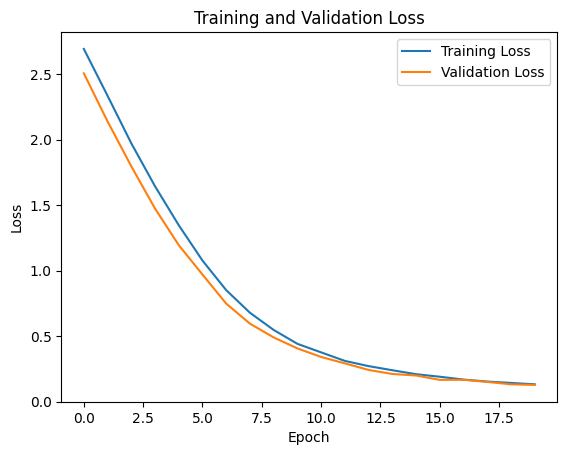

In [ ]:
import matplotlib.pyplot as plt
NUM_EPOCHS = 20
BATCH_SIZE = 300

history = autoencoder.fit(data, data, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_data, val_data))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

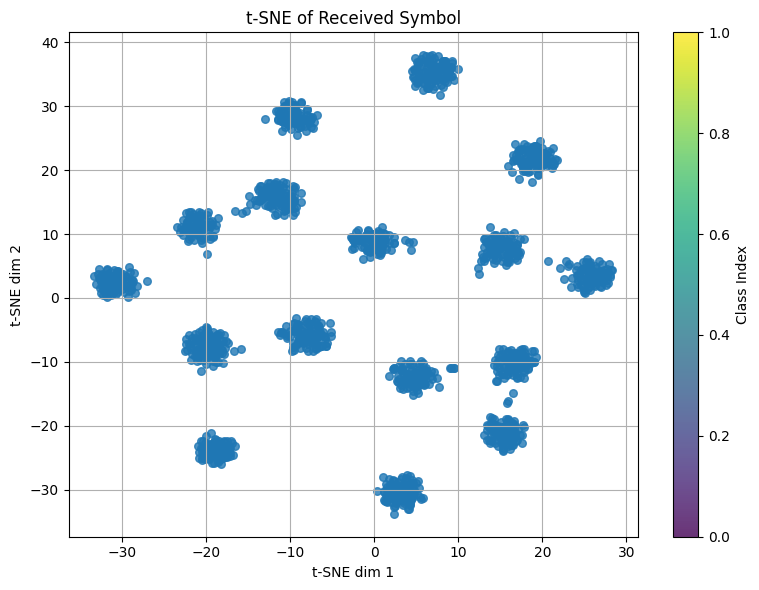

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
encoded = autoencoder.encoder(val_data)
noisy = autoencoder.channel(encoded)

noisy_real = tf.math.real(noisy).numpy()

tsne = TSNE(learning_rate=700, n_components=2,max_iter=35000, random_state=0, perplexity=60)
tsne_result = tsne.fit_transform(noisy_real)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                      s=30, alpha=0.8)
plt.title("t-SNE of Received Symbol")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(True)
plt.colorbar(scatter, label='Class Index')
plt.tight_layout()
plt.show()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -4.0 | 3.4667e-01 | 6.6000e-01 |         416 |        1200 |          198 |         300 |         0.1 |reached target block errors
     -3.5 | 3.3500e-01 | 6.3667e-01 |         402 |        1200 |          191 |         300 |         0.0 |reached target block errors
     -3.0 | 3.2000e-01 | 5.9667e-01 |         384 |        1200 |          179 |         300 |         0.0 |reached target block errors
     -2.5 | 3.2417e-01 | 5.6000e-01 |         389 |        1200 |          168 |         300 |         0.1 |reached target block errors
     -2.0 | 3.0667e-01 | 5.7333e-01 |         368 |        1200 |          172 |         300 |         0.0 |reached target block errors
     -1.5 | 2.8583e-01 | 5.2667e-01 |         343 |        1200 |

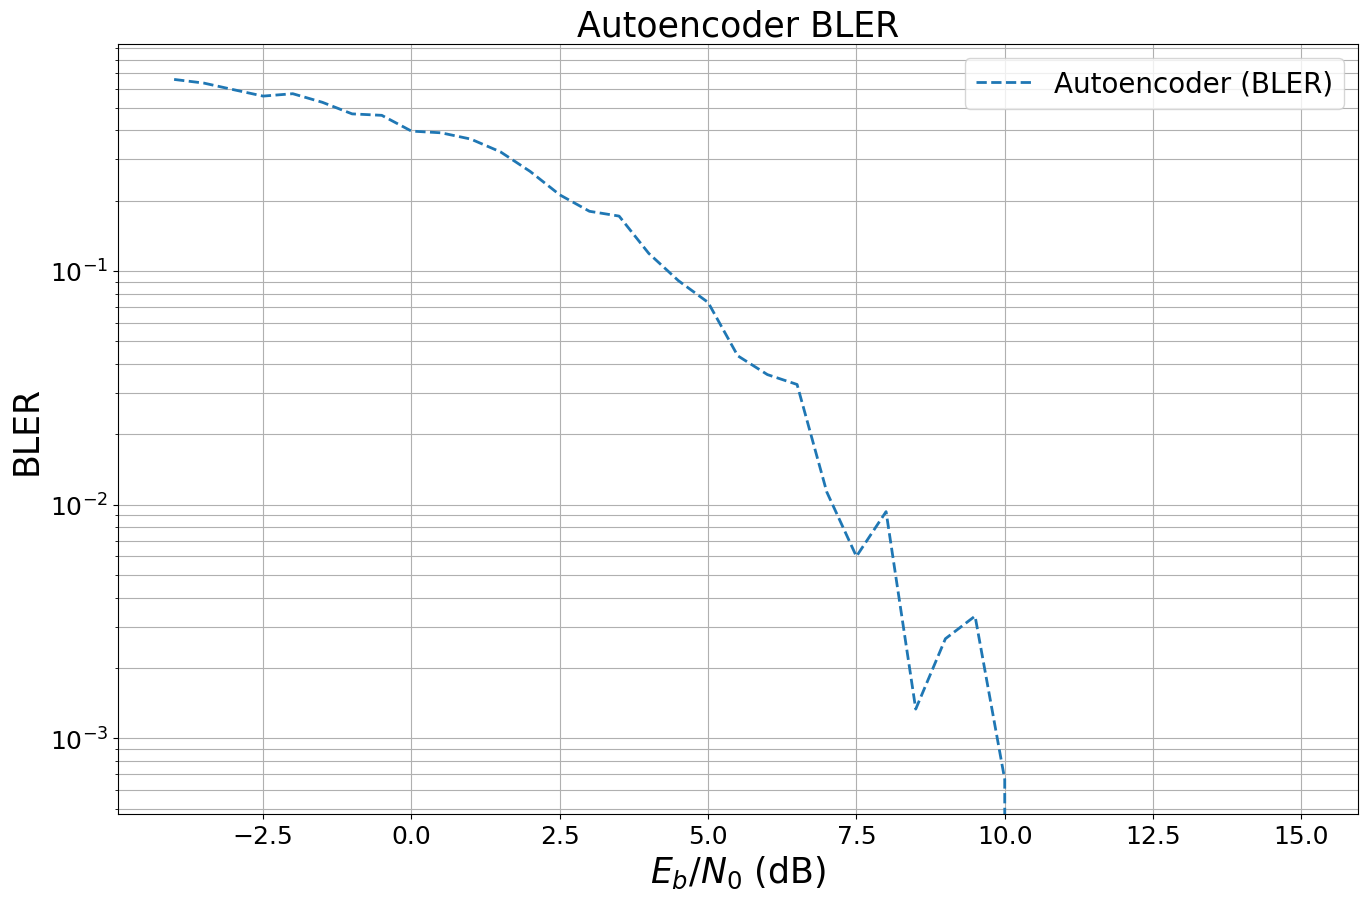

In [ ]:
def int_to_bits(int_array, n_bits=4):
    return ((int_array[:, None] & (1 << np.arange(n_bits)[::-1])) > 0).astype(np.uint8)

def mc_fun(batch_size, ebno_db):
    symbols = np.random.randint(0, M, size=batch_size)
    x = tf.one_hot(symbols, depth=M)
    no = ebnodb2no(ebno_db, bps, R)
    no = tf.constant(no , dtype=tf.float32)
    autoencoder.channel.no = no
    y_hat = autoencoder(x, training=False)
    pred = np.argmax(y_hat, axis=1)
    b_true = int_to_bits(symbols,n_bits=k)
    b_pred = int_to_bits(pred,n_bits=k)
    return b_true, b_pred

EbNodB_range = np.arange(-4, 15.5, 0.5)
bler_plot = sionna.phy.utils.PlotBER("Autoencoder BLER")
bler_plot.simulate(
    mc_fun,
    ebno_dbs=EbNodB_range,
    batch_size=BATCH_SIZE,
    num_target_block_errors=100,
    legend="Autoencoder",
    soft_estimates=False,
    max_mc_iter=5,
    show_fig=True,
    add_bler=True,
    add_ber=False);